In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [2]:
class LassoFeatImportance(object):
    
    def __init__(self,df):
        self.df = df
    
    def yX_split(self,y_colname,X_colnames):
        self.y_colname = y_colname
        self.X_colnames = X_colnames
        self.y = self.df[y_colname]
        self.X = self.df[X_colnames]
        return 
    
    def train_test(self,test_size = 0.33,random_state = 42):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_size, random_state=random_state)
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        return

    def gridSearch(self,alpha_lb = 0.1,alpha_ub = 10,step = 0.1,cv = 5,verbose = 3):
        step_0 = ('scaler',StandardScaler())
        step_1 = ('model',Lasso())
        
        pipeline = Pipeline([step_0,step_1])
        
        self.model_alpha = np.arange(alpha_lb,alpha_ub,step)
        self.cv = cv
        self.verbose = verbose
        
        input_dict = {'model__alpha':self.model_alpha}
        
        search = GridSearchCV(pipeline,
                              input_dict,
                              cv = cv,
                              scoring = 'neg_mean_squared_error',
                              verbose = verbose)
        
        search.fit(self.X_train,self.y_train)
        self.search = search
        return


    def results(self):
        coefficients = self.search.best_estimator_.named_steps['model'].coef_
        importance = np.abs(coefficients)
        self.accepted = np.array(self.X_colnames)[importance > 0]
        self.rejected = np.array(self.X_colnames)[importance == 0]
        return
    
    def print_accepted(self):
        print('Accepted Features:',self.accepted)
        print('Rejected Features:',self.rejected)
        print('best_params',self.search.best_params_)
        return 

In [3]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)

features = load_diabetes()['feature_names']

X = pd.DataFrame(X,columns = features)
y = pd.Series(y,name = 'y')
df = pd.concat([y,X],axis = 1)



In [4]:
y_colname = 'y'
X_colnames = df.loc[:,df.columns!='y'].columns

self = LassoFeatImportance(df = df)
self.yX_split(y_colname,X_colnames)
self.train_test()
self.gridSearch(alpha_lb = 0.1,alpha_ub = 10,step = 0.01,cv = 10,verbose = 0)
self.results()
self.print_accepted()

Accepted Features: ['sex' 'bmi' 'bp' 's1' 's3' 's5']
Rejected Features: ['age' 's2' 's4' 's6']
best_params {'model__alpha': 1.4599999999999995}


In [28]:
x = np.arange(1,100)

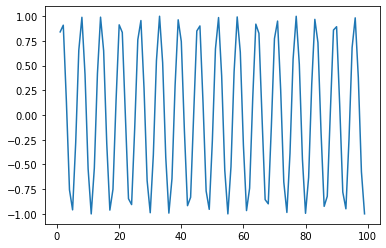

In [32]:
plt.plot(x,np.sin(x))